# Neural Networks with keras and tensorflow

N.B. You will need to pip install keras and tensorflow!

In [1]:
import tensorflow

In [2]:
import keras

Using TensorFlow backend.


In [5]:
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import pandas as pd

For this lesson we'll use sklearn's built-in breast cancer dataset. The next cell loads the data and prints the data description.

In [4]:
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

Ten real-valued features are computed for each cell nucleus:

*radius (mean of distances from center to points on the perimeter) <br>
*texture (standard deviation of gray-scale values)<br>
*perimeter<br>
*area<br>
*smoothness (local variation in radius lengths)<br>
*compactness (perimeter² / area — 1.0)<br>
*concavity (severity of concave portions of the contour)<br>
*concave points (number of concave portions of the contour)<br>
*symmetry<br>
*fractal dimension (“coastline approximation” — 1)<br>

In [8]:
cancer = load_breast_cancer()
print(cancer.keys())

data = pd.DataFrame(cancer.data, columns=[cancer.feature_names])
print(data.describe())

data = data.assign(target=pd.Series(cancer.target))
print(data.describe())

# In case you want labels instead of numbers.
data.replace(to_replace={'target': {0: cancer.target_names[0]}}, inplace=True)
data.replace(to_replace={'target': {1: cancer.target_names[1]}}, inplace=True)
print(data.shape) # data.describe() won't show the "target" column here because I converted its value to string.

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
      mean radius mean texture mean perimeter    mean area mean smoothness  \
count  569.000000   569.000000     569.000000   569.000000      569.000000   
mean    14.127292    19.289649      91.969033   654.889104        0.096360   
std      3.524049     4.301036      24.298981   351.914129        0.014064   
min      6.981000     9.710000      43.790000   143.500000        0.052630   
25%     11.700000    16.170000      75.170000   420.300000        0.086370   
50%     13.370000    18.840000      86.240000   551.100000        0.095870   
75%     15.780000    21.800000     104.100000   782.700000        0.105300   
max     28.110000    39.280000     188.500000  2501.000000        0.163400   

      mean compactness mean concavity mean concave points mean symmetry  \
count       569.000000     569.000000          569.000000    569.000000   
mean          0.104341       0.088799            0.048919      

In [10]:
keys = cancer.keys.values()
keys

AttributeError: 'builtin_function_or_method' object has no attribute 'values'

In [5]:
# Splitting our data and initializing a Scaler
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

In [6]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
# Transforming our data
X_train_s = ss.transform(X_train)
X_test_s = ss.transform(X_test)

## Constructing a Neural Network in Keras

In [16]:
# Importing model and layer types
from keras.models import Sequential
from keras.layers import Dense


In [17]:

#Importing our optimizer. The optimizer gives us a way to minimize some loss function. A normal gradient descent is a sort of wimpy optimizer.
from keras.optimizers import Adam


In [18]:
model = Sequential()

In [20]:
# Constructing and compiling our model
# model = Sequential()

inputs = X_train_s.shape[1]
hiddens = inputs
model.add(Dense(hiddens, input_dim=inputs, activation='relu'))
model.add(Dense(1))
adam = Adam()

In [21]:
model.compile(optimizer=adam, loss='mean_squared_error')

In [22]:
# Fitting our model
model.fit(X_train_s, y_train, validation_data=(X_test_s, y_test), epochs=20)


Train on 426 samples, validate on 143 samples
Epoch 1/20
426/426 [==============================] - 0s 128us/step - loss: 1.0192 - val_loss: 0.5894
Epoch 2/20
426/426 [==============================] - 0s 35us/step - loss: 0.3350 - val_loss: 0.2752
Epoch 3/20
426/426 [==============================] - 0s 31us/step - loss: 0.2376 - val_loss: 0.2099
Epoch 4/20
426/426 [==============================] - 0s 32us/step - loss: 0.1889 - val_loss: 0.1683
Epoch 5/20
426/426 [==============================] - 0s 37us/step - loss: 0.1622 - val_loss: 0.1450
Epoch 6/20
426/426 [==============================] - 0s 43us/step - loss: 0.1431 - val_loss: 0.1304
Epoch 7/20
426/426 [==============================] - 0s 38us/step - loss: 0.1286 - val_loss: 0.1198
Epoch 8/20
426/426 [==============================] - 0s 35us/step - loss: 0.1185 - val_loss: 0.1108
Epoch 9/20
426/426 [==============================] - 0s 30us/step - loss: 0.1095 - val_loss: 0.1032
Epoch 10/20
426/426 [=======================

In [23]:
#those val_losses are still going down, let's run it again with more epochs
model.compile(optimizer=adam, loss='mean_squared_error')
#fit and store that with a variable
history_log = model.fit(X_train_s, y_train, validation_data=(X_test_s, y_test), epochs=100)

Train on 426 samples, validate on 143 samples
Epoch 1/100
426/426 [==============================] - 0s 142us/step - loss: 0.0723 - val_loss: 0.0980
Epoch 2/100
426/426 [==============================] - 0s 40us/step - loss: 0.0625 - val_loss: 0.0770
Epoch 3/100
426/426 [==============================] - 0s 34us/step - loss: 0.0551 - val_loss: 0.0716
Epoch 4/100
426/426 [==============================] - 0s 35us/step - loss: 0.0483 - val_loss: 0.0619
Epoch 5/100
426/426 [==============================] - 0s 39us/step - loss: 0.0452 - val_loss: 0.0589
Epoch 6/100
426/426 [==============================] - 0s 32us/step - loss: 0.0409 - val_loss: 0.0571
Epoch 7/100
426/426 [==============================] - 0s 32us/step - loss: 0.0380 - val_loss: 0.0607
Epoch 8/100
426/426 [==============================] - 0s 29us/step - loss: 0.0380 - val_loss: 0.0540
Epoch 9/100
426/426 [==============================] - 0s 29us/step - loss: 0.0357 - val_loss: 0.0553
Epoch 10/100
426/426 [=============

In [24]:
# Storing that fit as a history log
history_log = model.fit(X_train_s, y_train, validation_data=(X_test_s, y_test), epochs=100)


Train on 426 samples, validate on 143 samples
Epoch 1/100
426/426 [==============================] - 0s 45us/step - loss: 0.0098 - val_loss: 0.0399
Epoch 2/100
426/426 [==============================] - 0s 34us/step - loss: 0.0101 - val_loss: 0.0428
Epoch 3/100
426/426 [==============================] - 0s 29us/step - loss: 0.0101 - val_loss: 0.0411
Epoch 4/100
426/426 [==============================] - 0s 37us/step - loss: 0.0099 - val_loss: 0.0402
Epoch 5/100
426/426 [==============================] - 0s 35us/step - loss: 0.0097 - val_loss: 0.0407
Epoch 6/100
426/426 [==============================] - 0s 31us/step - loss: 0.0095 - val_loss: 0.0398
Epoch 7/100
426/426 [==============================] - 0s 27us/step - loss: 0.0094 - val_loss: 0.0409
Epoch 8/100
426/426 [==============================] - 0s 35us/step - loss: 0.0092 - val_loss: 0.0403
Epoch 9/100
426/426 [==============================] - 0s 28us/step - loss: 0.0092 - val_loss: 0.0400
Epoch 10/100
426/426 [==============

In [25]:
# Plotting our losses
#distance on y axis, epochs on x axis
train_loss = history_log.history['loss']
test_loss = history_log.history['val_loss']


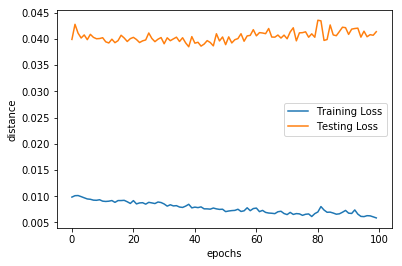

In [49]:
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.ylabel('distance')
plt.xlabel('epochs')
plt.legend()

In [56]:
X_test_s.shape

(143, 30)

In [54]:
model.predict(X_test_s)

ValueError: Tensor Tensor("dense_2/BiasAdd:0", shape=(?, 1), dtype=float32) is not an element of this graph.

In [53]:
np.hstack([model.predict(X_test_s), y_test.reshape(143, 1)])[:100]

ValueError: Tensor Tensor("dense_2/BiasAdd:0", shape=(?, 1), dtype=float32) is not an element of this graph.

## Tensorflow

In [27]:
import tensorflow as tf

In [28]:
a = 3
b = 5
c = a + b
c 
# (returns 8)

8

In [29]:
a += 1
#let's update a so this flows across the neural network

In [30]:
c

8

### Tensorflow as a graph constructor

In [35]:
# Constructing the graph

a = tf.Variable(3)
b = tf.Variable(5)

c = a * b
d = a + b * c

In [36]:
# Starting a session

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result = sess.run(d)

In [37]:
# Printing the output

print(result)

78


In [40]:
#suppose we change inputs

a = tf.Variable(4)
b = tf.Variable(5)

c = a + b
d = a + b + c

In [42]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    result = sess.run(d)

In [43]:
# Printing the output
#should return 49
print(result)

18


### Neural Network

In [45]:
X_train_s.shape
#(426, 30)

(426, 30)

In [46]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, 30))
y = tf.placeholder(dtype=tf.float32, shape=(None, 1))

hid = tf.layers.dense(X, 30, activation=tf.nn.relu)
y_hat = tf.layers.dense(hid, 1, activation=tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)
optimizer = tf.train.AdamOptimizer(0.01)
training_run = optimizer.minimize(loss)

saver = tf.train.Saver()

In [47]:
#0.34965034965034963
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for _ in range(100):
        sess.run(training_run, feed_dict={X: X_train_s, y: y_train.reshape(-1, 1)})
        
    pred = sess.run(y_hat, feed_dict={X: X_test_s})

classes = (pred > 0.5).astype(int)

metrics.accuracy_score(y_test.reshape(-1, 1), classes)

0.986013986013986